# mpg 데이터 실습

R 패키지에 포함되어 있는 예제 데이터로 1998년, 2004년, 2008년도에 미국에서 생산되는 자동차 제조회사별로 자동차의 연비,구동방식 등을 조사한 데이터.

## #01 패키지 및 샘플 데이터 준비

### 1) 패키지 가져오기

In [149]:
from pandas import DataFrame
from pandas import read_excel
from pandas import merge
from pandas import Categorical
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### 2) 예제 데이터 가져오기

In [2]:
xlsx = read_excel("http://itpaper.co.kr/data/mpg.xlsx", engine='openpyxl')
xlsx

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [194]:
mpg_df = xlsx.set_index('id')
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


### 3) 데이터 살펴보기

#### 데이터프레임의 각 컬럼이 갖는 의미

| 컬럼이름      | 설명 |
|--------------|-----|
| manufacturer | 제조회사 |
| model        | 자동차 모델명 |
| displ        | 배기량 |
| year         | 생산년도 |
| cyl          | 실린더 개수 |
| trans        | 변속기 종류 |
| drv          | 구동방식 |
| cty          | 도시연비 |
| hwy          | 고속도로 연비 |
| fl           | 연료 종류 |
| class        | 자동차 종류 |

#### 연료 종류(fl)컬럼에서 사용되는 코드값.

| 코드 | 설명 |
|----|----|
| c | CNG (2.35) - 가스 |
| d | diesel(2.38) - 디젤 |
| e | ethanol E85 (2.11) - 에탄올 혼합연료 |
| p | premium(2.76) - 고급 휘발유 |
| r | regular(2.22) - 보통 휘발유 |

## #02. 기술통계

### 1) 데이터 내용 확인하기

#### mpg 데이터의 크기 확인

In [4]:
행,열 = mpg_df.shape
print("행의 크기 =", 행)
print("열의 크기 =", 열)

행의 크기 = 234
열의 크기 = 11


### 2) 양적, 질적 자료 구분

#### 양적자료

요약정보에 집계가 되는 컬럼으로서 관측된 값이 수치 형태의 속성을 가지는 자료.

사분위수와 상자그림으로 데이터 분포를 확인해야 하는 값들이다.

- 범위형(interval) 자료: 화씨, 섭씨와 같이 수치 간에 차이가 의미를 가지는 자료.
- 비율(ratio) 자료: 무게와 같이 수치의 차이 뿐만 아니라 비율 또한 의미를 가지는 자료

> 배기량, 실린더 개수, 도시연비, 고속도로 연비

(이 중에서 생산년도와 실린더 개수는 데이터 값의 종류가 매우 적으므로 반드시 확인할 필요는 없다.)

#### 질적자료

범주 또는 순서 형태의 속성을 가지는 자료로서 도수 분포표와 히스토그램으로 데이터 분포를 확인해야 하는 값들이다.

- 범주형(명목, nominal) 자료: 사람의 피부색, 성별
- 순서(서수, ordinal) 자료: 제품의 품질, 등급, 순위

> 제조회사, 생산년도, 모델명, 변속기 종류, 구동방식, 연료 종류, 자동차 종류

외부에서 가져온 데이터의 컬럼을 질적 자료로 변환하는 코드 형식

```python
데이터프레임['컬럼'] = 데이터프레임['컬럼'].astype('category')
```

쉽게 이야기 하면 카테고리 형태와 그 외의 형태(숫자)를 구분하는 것

In [5]:
mpg_df['manufacturer'] = mpg_df['manufacturer'].astype('category')
mpg_df['model'] = mpg_df['model'].astype('category')
mpg_df['year'] = mpg_df['year'].astype('category')
mpg_df['trans'] = mpg_df['trans'].astype('category')
mpg_df['drv'] = mpg_df['drv'].astype('category')
mpg_df['fl'] = mpg_df['fl'].astype('category')
mpg_df['class'] = mpg_df['class'].astype('category')

mpg_df.dtypes

manufacturer    category
model           category
displ            float64
year            category
cyl                int64
trans           category
drv             category
cty                int64
hwy                int64
fl              category
class           category
dtype: object

### 3) 양적 자료의 기술통계

#### 요약정보 확인

In [6]:
mpg_df.describe()

,displ,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000
mean,3.471795,5.888889,16.858974,23.440171
std,1.291959,1.611534,4.255946,5.954643
min,1.600000,4.000000,9.000000,12.000000
25%,2.400000,4.000000,14.000000,18.000000
50%,3.300000,6.000000,17.000000,24.000000
75%,4.600000,8.000000,19.000000,27.000000
max,7.000000,8.000000,35.000000,44.000000


#### 상자그림을 통한 데이터 분포 확인하기

##### 그래프 기본 설정

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

##### 상자그림 확인

배기량, 실린더 개수, 도시연비, 고속도로 연비

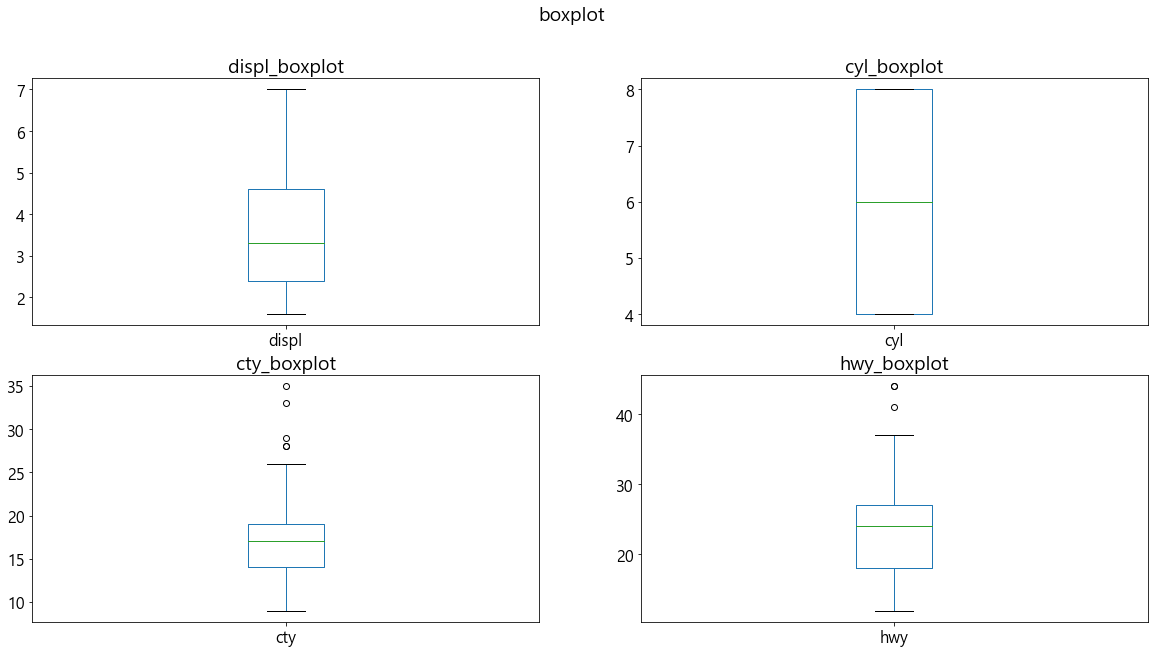

In [34]:
# 2행 2열의 subplot 형태로 배기량, 실린더 개수, 도시연비, 고속도로 연비에 대한 상자그림을 표시하시오.
fig, ax = plt.subplots(2,2)
ax = np.ravel(ax)

plt.suptitle('boxplot')
for i,v in enumerate(mpg_df.describe()):
    mpg_df[v].plot.box(ax = ax[i])
    ax[i].set_title('%s_boxplot' %v)

### 4) 질적 자료에 대한 데이터 빈도 확인

#### 데이터 빈도수 확인하기

In [35]:
mpg_df.dtypes

manufacturer    category
model           category
displ            float64
year            category
cyl                int64
trans           category
drv             category
cty                int64
hwy                int64
fl              category
class           category
dtype: object

In [36]:
for i in mpg_df.dtypes.index:
    if str(mpg_df.dtypes[i]) == 'category':
        print("-" * 30)
        print("|", i)
        print("-" * 30)
        print(mpg_df[i].value_counts())
        print()

------------------------------
| manufacturer
------------------------------
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

------------------------------
| model
------------------------------
caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
jetta                      9
mustang                    9
dakota pickup 4wd          9
impreza awd                8
grand cherokee 4wd         8
a4 quattro                 8
camry solara               7
a4                         7
passat                     7
camry                      7
durango 4wd                7
sonata                     7
tiburon                    7
f150 pickup 4wd            7
toyota tacoma 4wd          7
new beetle                 6
4runner 4wd  

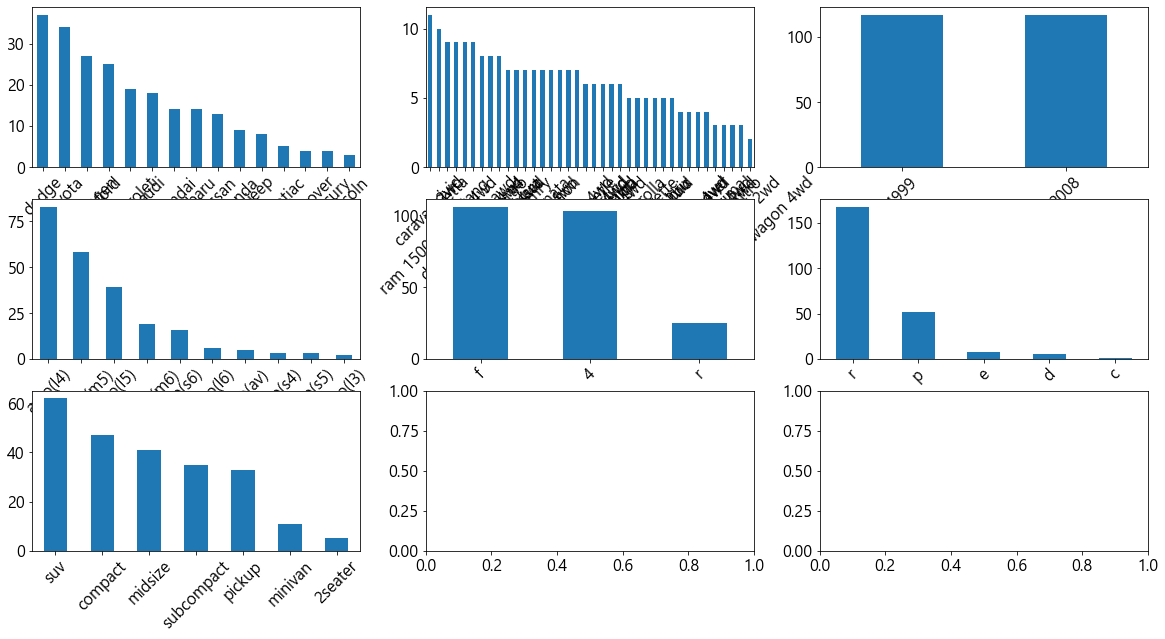

In [71]:
# 3행 3열로 구성된 서브플롯을 생성하고
# 아래의 반복문 조건에 따라 mpg_df[i] 에 대한 히스토그램을
# 서브플롯에 순차적으로 표시하세요.
# 

fig,ax = plt.subplots(3,3)
ax = np.ravel(ax)

ax_idx = 0

for i in mpg_df.dtypes.index:
    if str(mpg_df.dtypes[i]) == 'category':
        mpg_df[i].value_counts().plot.bar(ax=ax[ax_idx], rot=45)
        ax_idx += 1

### 5) 문제
#### Q1) 자동차 배기량에 따라 고속도로 연비가 다른지 알아보려고 한다. displ(배기량)이 4 이하인 자동차와 5 이상인 자동차 중 어떤 자동차의 hwy(고속도로 연비)의 평균을 막대 그래프로 비교하시오.

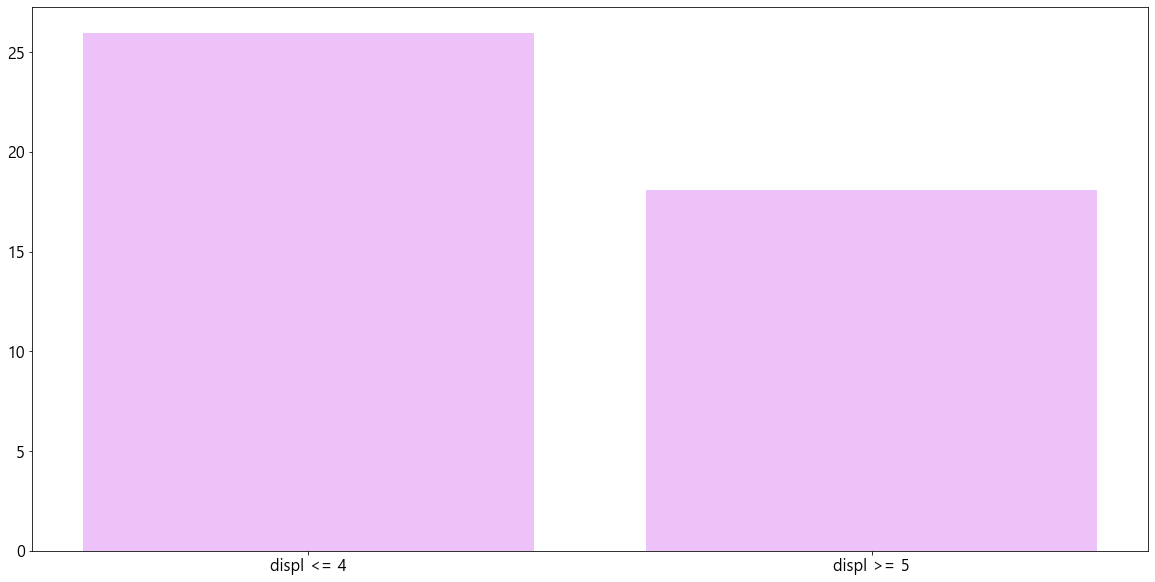

<function matplotlib.pyplot.close(fig=None)>

In [92]:
data = [mpg_df.query("displ <= 4")['hwy'].mean(), mpg_df.query("displ >= 5")['hwy'].mean()]

x = list(range(0,len(data)))

plt.figure()
plt.bar(x, data, color = '#ecc2f9')
plt.xticks(x,['displ <= 4', 'displ >= 5'])
plt.show()
plt.close

#### Q2) 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. “audi”와 “toyota” 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지에 대해 막대 그래프로 시각화 하시오.

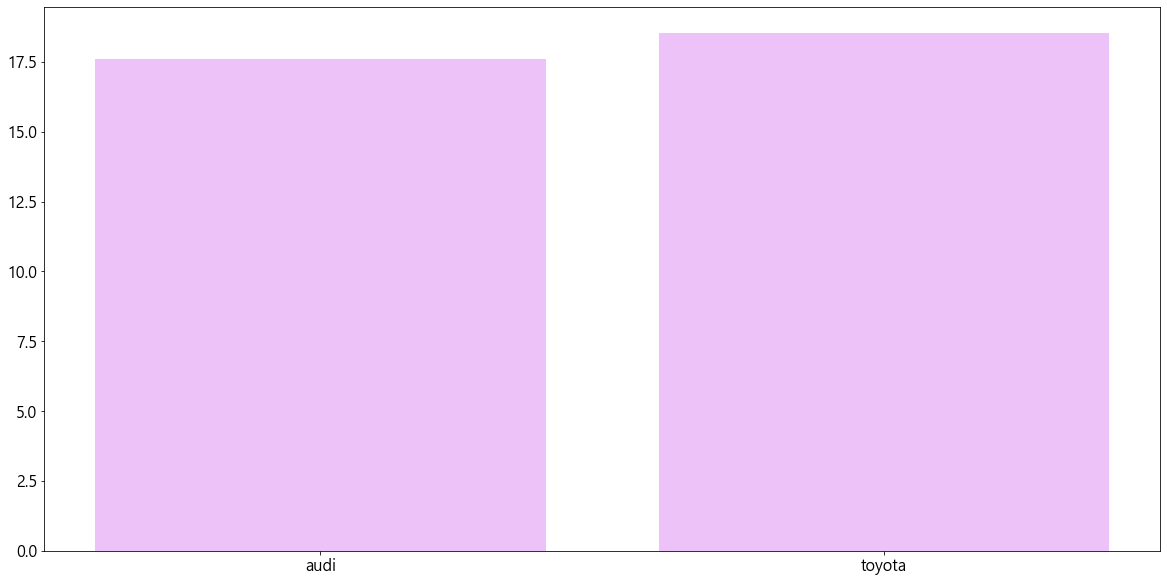

<function matplotlib.pyplot.close(fig=None)>

In [93]:
data = [mpg_df.query("manufacturer == 'audi'").mean()['cty'],mpg_df.query("manufacturer == 'toyota'").mean()['cty']]

x = list(range(0,len(data)))

plt.figure()
plt.bar(x, data, color = '#ecc2f9')
plt.xticks(x,['audi', 'toyota'])
plt.show()
plt.close

#### Q3) “chevrolet”, “ford”, “honda” 자동차의 고속도로 연비 평균을 알아보려고 한다. 이 회사들의 데이터를 추출한 후 각 제조사별 hwy 평균을 시각화 하시오.

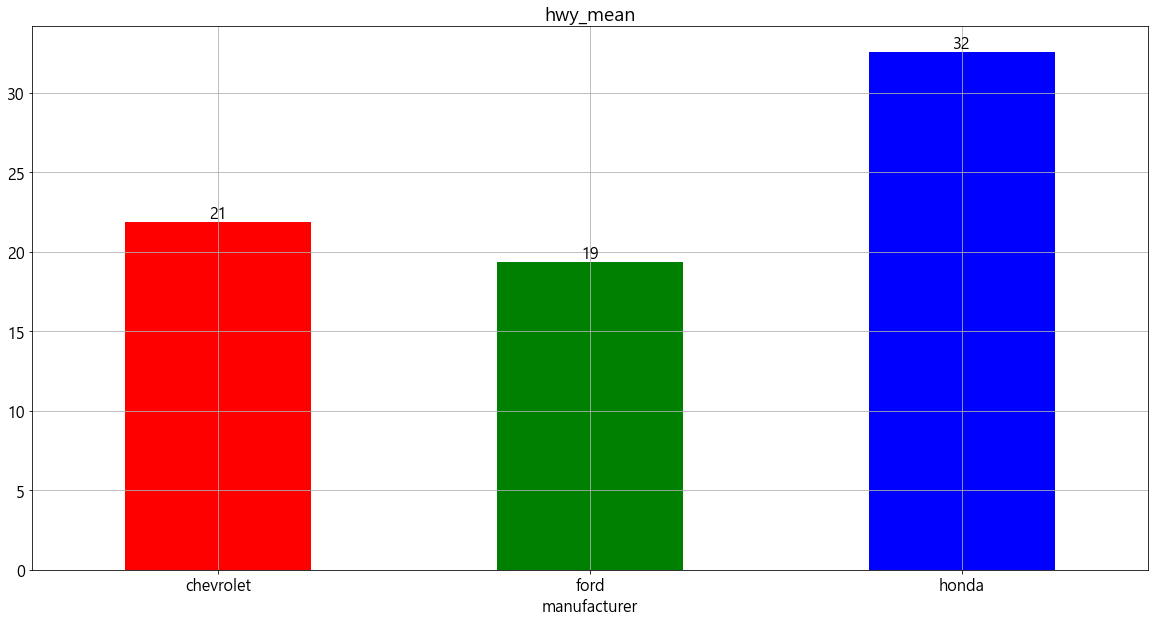

In [123]:
manu = ['chevrolet', 'ford', 'honda']
grouped = mpg_df.query("manufacturer == @manu")

group_mean = grouped['hwy'].groupby( grouped['manufacturer']).mean()
group_mean.dropna(inplace = True)

group_mean.plot.bar(rot = 0, color = ['red', 'green', 'blue'])
plt.grid()
plt.title('hwy_mean')

for i,v in enumerate(group_mean):
    text = '%d' %v
    plt.text(i,v,text,horizontalalignment = 'center', verticalalignment = 'bottom')


#### Q4) 데이터 전처리 문제

mpg 데이터의 fl 변수는 자동차에 사용하는 연료(fuel)를 의미한다. (각 연료 이름의 첫 글자만 저장.)

mpg 데이터에는 연료 종류를 나타낸 fl 변수는 있지만 연료 가격을 나타낸 변수는 없다.

다음의 가격정보를 이용해 mpg 데이터에 price_fl(연료가격) 변수를 추가하라.

| 코드 | 종류 | 가격 |
|----|----|----|
| c | 가스 | 2.35 달러 |
| d | 디젤 | 2.38 달러 |
| e | 에탄올 혼합연료 | 2.11 달러 |
| p | 고급 휘발유 | 2.76 달러 |
| r | 보통 휘발유 | 2.22 달러 |

추가한 결과에서 제조회사와 모델별 연료 단가를 피벗테이블로 출력하시오.

In [267]:
가격정보 = [{'fl' : 'c', 'price_fl' : 2.35},
       {'fl' : 'd', 'price_fl' : 2.38},
       {'fl' : 'e', 'price_fl' : 2.11},
       {'fl' : 'p', 'price_fl' : 2.76},
       {'fl' : 'r', 'price_fl' : 2.22}
       ]

가격정보df = DataFrame(가격정보)
mpg_df = merge(mpg_df,가격정보df, left_on = 'fl', right_on = 'fl', how = 'left')
mpg_df


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76


In [268]:
pv = pd.pivot_table(mpg_df, index = 'manufacturer', columns = 'model', values = 'price_fl')
pv

model,4runner 4wd,a4,a4 quattro,a6 quattro,altima,c1500 suburban 2wd,camry,camry solara,caravan 2wd,civic,...,mustang,navigator 2wd,new beetle,passat,pathfinder 4wd,ram 1500 pickup 4wd,range rover,sonata,tiburon,toyota tacoma 4wd
manufacturer,,,,,,,,,,,,,,,,,,,,,
audi,NaN,2.76,2.76,2.76,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chevrolet,NaN,NaN,NaN,NaN,NaN,2.198,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.21,NaN,...,NaN,NaN,NaN,NaN,NaN,2.198,NaN,NaN,NaN,NaN
ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.354444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.22,2.22,NaN
jeep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land rover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.49,NaN,NaN,NaN
lincoln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q5) 데이터 정제 문제

고속도로 연비와 도시연비 데이터의 이상치를 찾아 평균값으로 대체하라.

<AxesSubplot:>

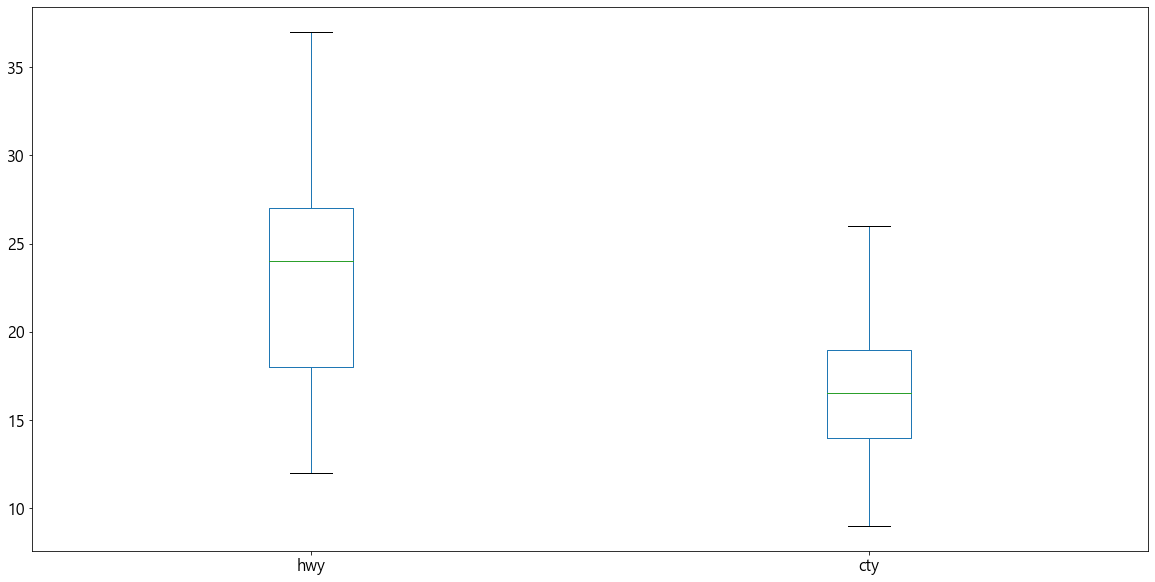

In [295]:
from sklearn.impute import SimpleImputer

copy_df = mpg_df.copy()

hwy_q3 = mpg_df['hwy'].quantile(q=0.75)
cty_q3 = mpg_df['cty'].quantile(q=0.75)

hwy_q1 = mpg_df['hwy'].quantile(q=0.25)
cty_q1 = mpg_df['cty'].quantile(q=0.25)

hwy_iqr = hwy_q3 - hwy_q1

cty_iqr = cty_q3 - cty_q1

hwy_max_lim = hwy_q3 + 1.5 * hwy_iqr
cty_max_lim = cty_q3 + 1.5 * cty_iqr

hwy_이상치df = mpg_df.query('hwy > @hwy_max_lim')
cty_이상치df = mpg_df.query('cty > @cty_max_lim')

for i in hwy_이상치df.index:
    copy_df.loc[i, 'hwy'] = np.nan
    
for i in cty_이상치df.index:
    copy_df.loc[i, 'cty'] = np.nan
    
정제규칙 = SimpleImputer(missing_values=np.nan, strategy='mean')
정제규칙_적용결과 = 정제규칙.fit_transform(copy_df.filter(['hwy','cty']).values)

이상치정제 = DataFrame(정제규칙_적용결과, index = copy_df.filter(['hwy','cty']).index , columns = copy_df.filter(['hwy','cty']).columns)
이상치정제.plot.box()

### Q6) 데이터 시각화 문제

구동방식을 의미하는 `drv` 변수는 4=4균구동, f=전륜구동, r=후륜구동을 의미한다. <br>
구동방식별 연비 평균을 평균을 비교하기에 적절한 그래프 형태로 시각화 하라.

Text(0.5, 1.0, '구동방식별 연비 평균비교')

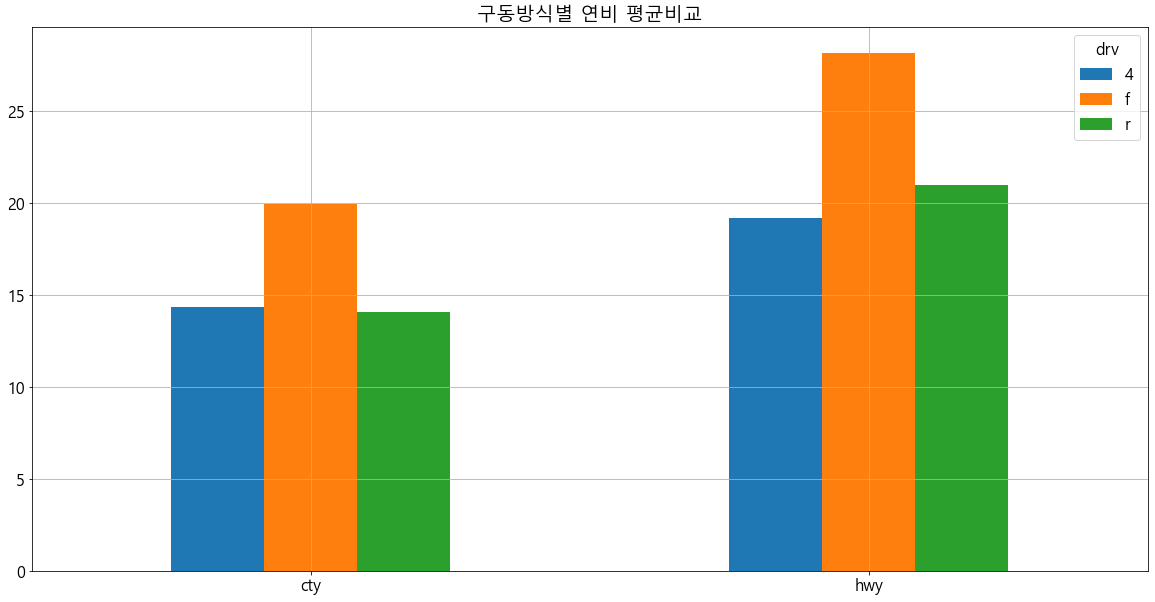

In [170]:
drv_mean = mpg_df.groupby('drv').mean().filter(['cty', 'hwy']).T
#drv_mean

drv_mean.plot.bar(rot = 0)
plt.grid()
plt.title('구동방식별 연비 평균비교')

### Q7) 데이터 시각화 문제

q2) 자동차 중에서 어떤 class(자동차 종류)가 가장 많은지 알아보려고 한다. 자동차 종류별 빈도를 시각화 하시오.

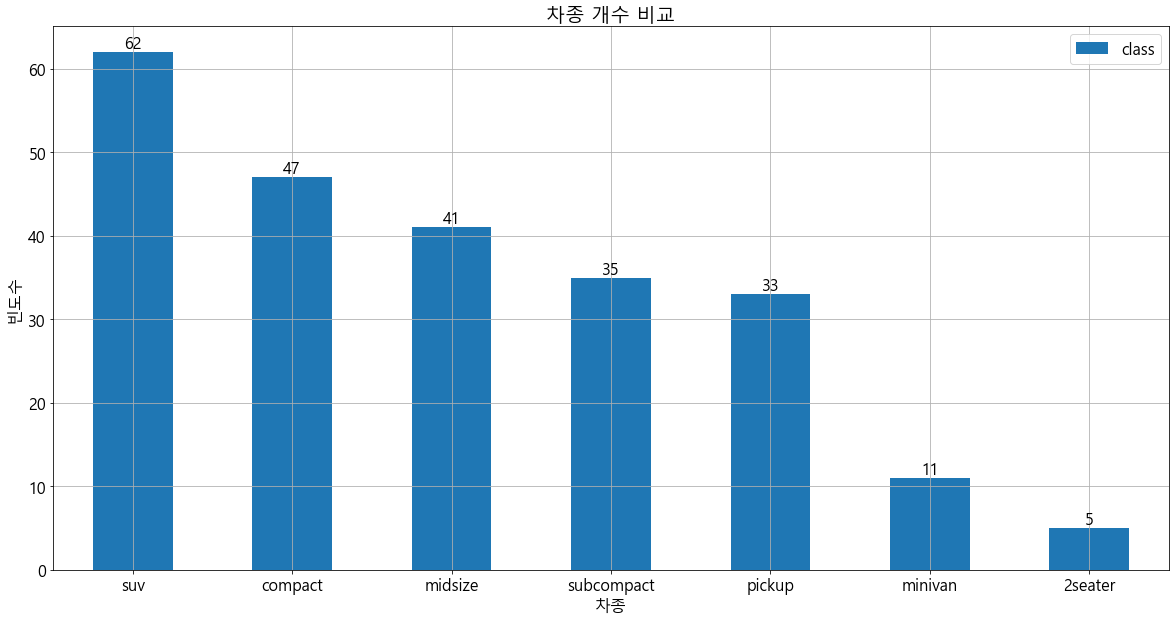

In [179]:
class_count = mpg_df['class'].value_counts()

class_count.plot.bar(rot = 0)
plt.grid()
plt.legend()
plt.title('차종 개수 비교')
plt.xlabel('차종')
plt.ylabel('빈도수')

for i,v in enumerate(class_count):
    text = '%d' %v
    plt.text(i,v,text,horizontalalignment = 'center', verticalalignment = 'bottom')

### Q8) 데이터 시각화 문제

실린더 수와 평균연비 간의 상관 관계를 시각화 하시오.

Text(6.5, 25, 'f(x)=-3.039639x+41.978879')

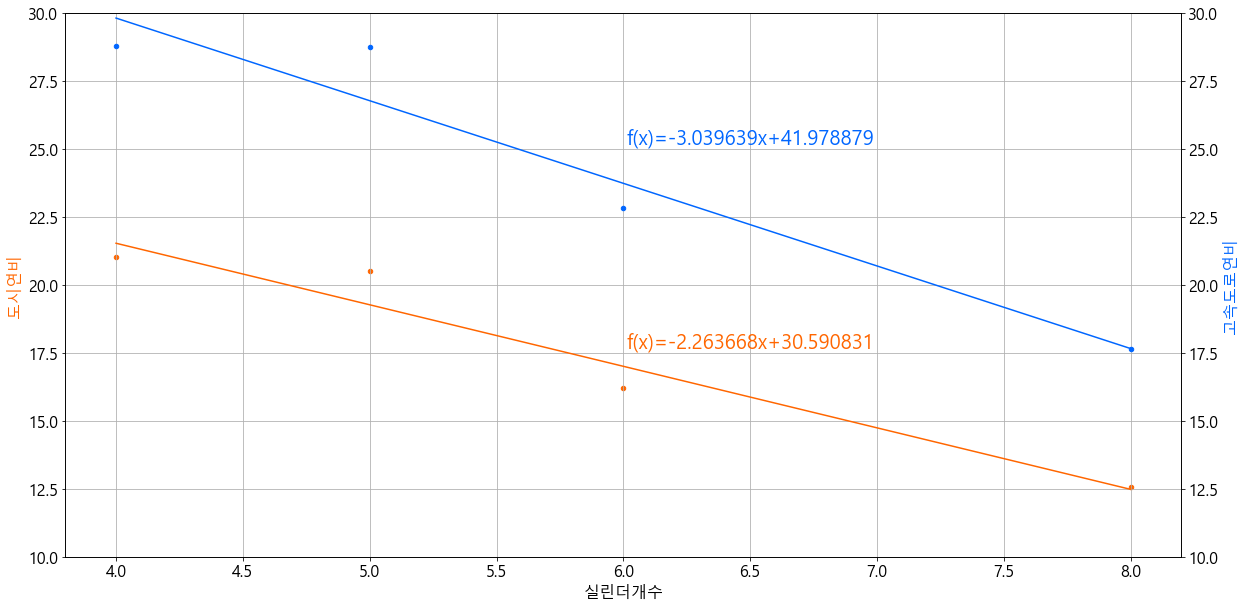

In [265]:
cyl_mean = mpg_df.groupby('cyl').mean().filter(['cty', 'hwy']).reset_index()

fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

cyl_mean.plot.scatter(ax = ax1, x = 'cyl', y = 'cty', color='#ff6600', marker='o')
ax1.set_ylim([10,30])
ax1.set_ylabel('도시연비', color='#ff6600')
ax1.set_xlabel('실린더개수')
ax1.grid()

x = cyl_mean['cyl']
y = cyl_mean['cty']
z = np.polyfit(x, y, 1)   # (X,Y,차원) 정의
f = np.poly1d(z)

plt.plot(x,f(x),'#ff6600') 
plt.text(6.5, 17.5, "f(x)=%fx+%f" % (f[1], f[0]), fontsize=20, color='#ff6600', 
                    horizontalalignment='center', verticalalignment='bottom')

cyl_mean.plot.scatter(ax = ax2, x = 'cyl', y = 'hwy', color='#0066ff', marker='o')
ax2.set_ylim([10,30])
ax2.set_ylabel('고속도로연비', color='#0066ff')

x = cyl_mean['cyl']
y = cyl_mean['hwy']
z = np.polyfit(x, y, 1)   # (X,Y,차원) 정의
f = np.poly1d(z)

plt.plot(x,f(x),'#0066ff') 
plt.text(6.5, 25, "f(x)=%fx+%f" % (f[1], f[0]), fontsize=20, color='#0066ff', 
                    horizontalalignment='center', verticalalignment='bottom')

### Q9) 데이터 시각화 문제

년도별로 생산된 차종(`class`)의 **비율**을 1행 3열의 서브플롯에 시각화 하시오.

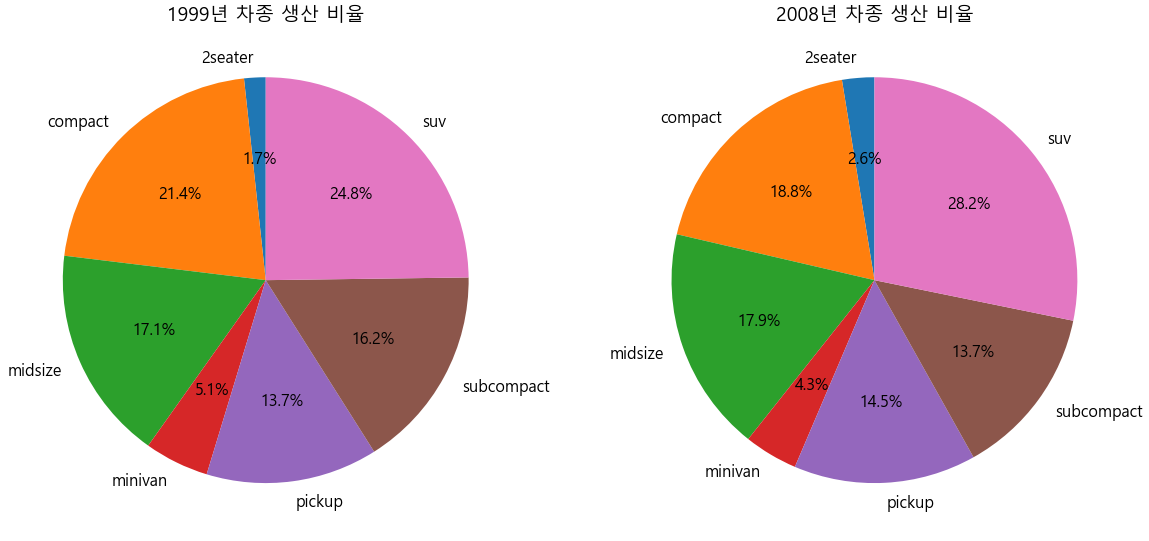

In [221]:
year_class = mpg_df.groupby('year')['class'].value_counts()
year_class = year_class.unstack().T

fig, ax = plt.subplots(1,2)

for i,v in enumerate(year_class):
    year_class[v].plot.pie(ax = ax[i],autopct='%0.1f%%',startangle=90)
    ax[i].title.set_text('%s년 차종 생산 비율' %v)
    ax[i].set(ylabel = None)